In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv(r'C:\Users\hp\Downloads\placement.csv')
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [6]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [8]:
df.iloc[: , 1:]

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [9]:
import matplotlib.pyplot as plt

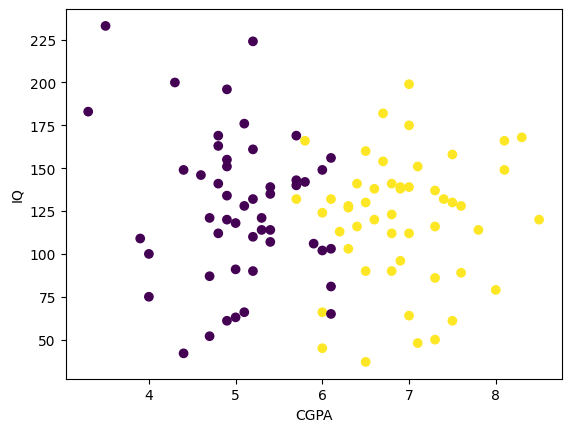

In [10]:
plt.scatter(df['cgpa'] , df['iq'] , c= df['placement'])
plt.xlabel("CGPA")
plt.ylabel('IQ')
# plt.colorbar()
plt.show()

In [11]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import sklearn
print(sklearn.__version__)  # Shows the installed version

1.6.1


In [13]:
X = df.iloc[:,1:3]
y = df.iloc[:,-1]

In [14]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [15]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.1)

In [17]:
y_train

24    0
47    0
1     0
83    1
4     0
     ..
3     1
63    1
42    1
73    0
58    1
Name: placement, Length: 90, dtype: int64

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
X_train = scaler.fit_transform(X_train)
X_train

array([[-1.13491106e+00, -7.13598871e-02],
       [-6.98779568e-01,  9.09157646e-01],
       [-8.81954795e-02, -4.39053962e-01],
       [ 1.30742529e+00,  1.49256558e-01],
       [-1.75421778e-01,  4.43411818e-01],
       [ 6.96841206e-01, -2.91976332e-01],
       [-9.69181093e-04,  6.15002386e-01],
       [ 3.47936012e-01, -1.93924579e-01],
       [-1.13491106e+00, -1.76275263e+00],
       [-5.24326971e-01,  3.69873003e-01],
       [ 1.13297270e+00, -1.81177851e+00],
       [ 9.58520101e-01,  6.64028263e-01],
       [ 8.62571173e-02, -5.12592777e-01],
       [-2.62648076e-01,  1.10526115e+00],
       [-2.18162664e+00,  2.67408921e+00],
       [-1.04768476e+00,  1.10526115e+00],
       [ 8.71293803e-01,  3.69873003e-01],
       [-6.98779568e-01, -8.31260975e-01],
       [-7.86005867e-01,  1.00230681e-01],
       [ 5.22388609e-01,  3.45360064e-01],
       [-2.62648076e-01,  4.67924756e-01],
       [-1.39658996e+00,  6.15002386e-01],
       [-5.24326971e-01,  2.71821249e-01],
       [-1.

In [21]:
X_test = scaler.transform(X_test)
X_test

array([[-1.04768476e+00,  4.18898879e-01],
       [ 9.58520101e-01, -1.86080438e+00],
       [ 1.30742529e+00,  8.35618831e-01],
       [ 3.47936012e-01,  4.18898879e-01],
       [-8.73232165e-01, -1.44898702e-01],
       [-6.11553270e-01, -7.13598871e-02],
       [-1.74549515e+00, -5.86131592e-01],
       [ 8.62571173e-02,  1.98282434e-01],
       [-9.69181093e-04,  2.17892785e-03],
       [ 6.96841206e-01, -2.23340105e-02]])

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
from sklearn import set_config
set_config(display="text")
clf = LogisticRegression()
clf.fit(X_train, y_train)

params = clf.get_params()
formatted_output = f"LogisticRegression({', '.join(f'{k}={v}' for k, v in params.items())})"
print(formatted_output)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class=deprecated, n_jobs=None, penalty=l2, random_state=None, solver=lbfgs, tol=0.0001, verbose=0, warm_start=False)


In [24]:
y_pred = clf.predict(X_test)

In [25]:
y_test

51    0
5     1
91    1
54    1
67    0
2     0
18    0
71    1
27    1
0     1
Name: placement, dtype: int64

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(y_test , y_pred)

0.9

In [28]:
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

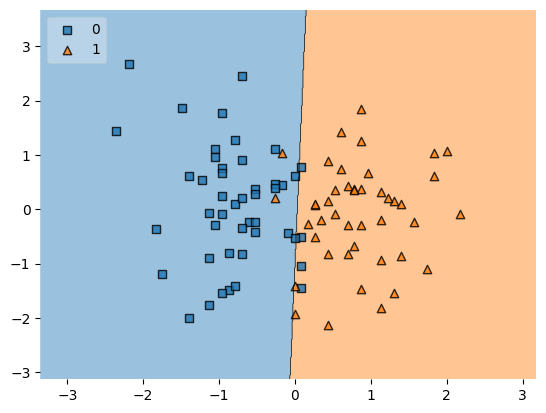

In [30]:
plot_decision_regions(X_train , y_train.values , clf=clf ,legend = 2)